<a href="https://colab.research.google.com/github/Sezo-code/Michine-Learning/blob/main/Health_Care_Data_Analytics_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Care Data Analytics_Clinical_Records Project 2024**

> Add blockquote



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
df = pd.read_csv('/content/healthcare_patient_data.csv')
df.head()

,PatientID,Age,Gender,AdmissionDate,DischargeDate,Department,Diagnosis,LengthOfStay,Readmitted,Mortality,PatientSatisfaction,InsuranceStatus,RevenueGenerated,Cost,BedOccupancyStatus
0,1,32,Male,21/05/2022,25/05/2022,Orthopedics,Hypertension,4,No,No,5,Yes,3157.22,417.60,Occupied
1,2,47,Male,15/10/2022,19/10/2022,Oncology,Fracture,4,No,No,1,Yes,3641.63,1558.93,Occupied
2,3,61,Male,17/02/2022,24/02/2022,Cardiology,Stroke,7,No,No,1,No,2913.03,3900.53,Occupied
3,4,88,Female,18/11/2022,28/11/2022,Emergency,Heart Disease,10,No,No,2,No,4933.50,3464.68,Available
4,5,66,Female,21/08/2022,27/08/2022,Orthopedics,Stroke,6,No,No,1,Yes,2903.63,1205.80,Occupied


In [ ]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'AdmissionDate', 'DischargeDate',
       'Department', 'Diagnosis', 'LengthOfStay', 'Readmitted', 'Mortality',
       'PatientSatisfaction', 'InsuranceStatus', 'RevenueGenerated', 'Cost',
       'BedOccupancyStatus'],
      dtype='object')


In [ ]:
# Check the unique values in the Mortality column
print(df['Mortality'].unique())

# Create age brackets
age_brackets = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

# Add the age bracket to the DataFrame
df['AgeBracket'] = age_brackets

# If Mortality is 'Yes'/'No', convert to binary (1 for 'Yes' and 0 for 'No')
df['MortalityBinary'] = df['Mortality'].map({'Yes': 1, 'No': 0})  # Adjust this if needed

# Group by AgeBracket and calculate mortality rate
mortality_by_age = df.groupby('AgeBracket')['MortalityBinary'].value_counts(normalize=True).unstack().fillna(0)


['No' 'Yes']


<ipython-input-3-8d594fce04c9>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_by_age = df.groupby('AgeBracket')['MortalityBinary'].value_counts(normalize=True).unstack().fillna(0)


# **Check Data For Duplicates**

In [ ]:
# prompt: check duplicates

# Check for duplicates based on all columns
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Check for duplicates based on specific columns (e.g., 'PatientID', 'Age', 'Gender')
# Replace 'PatientID', 'Age', 'Gender' with the actual columns you want to check
duplicates_specific_columns = df[df.duplicated(subset=['PatientID', 'Age', 'Gender'])]
print("\nDuplicate Rows based on specific columns:")
print(duplicates_specific_columns)

# Number of duplicates
num_duplicates = len(duplicates)
print(f"\nTotal number of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [PatientID, Age, Gender, AdmissionDate, DischargeDate, Department, Diagnosis, LengthOfStay, Readmitted, Mortality, PatientSatisfaction, InsuranceStatus, RevenueGenerated, Cost, BedOccupancyStatus, AgeBracket, MortalityBinary, Year, Quarter, Month, Week, Department_Encoded, BedOccupancy, BedOccupancyGroup]
Index: []

[0 rows x 24 columns]

Duplicate Rows based on specific columns:
Empty DataFrame
Columns: [PatientID, Age, Gender, AdmissionDate, DischargeDate, Department, Diagnosis, LengthOfStay, Readmitted, Mortality, PatientSatisfaction, InsuranceStatus, RevenueGenerated, Cost, BedOccupancyStatus, AgeBracket, MortalityBinary, Year, Quarter, Month, Week, Department_Encoded, BedOccupancy, BedOccupancyGroup]
Index: []

[0 rows x 24 columns]

Total number of duplicate rows: 0


# **Check for null values**

In [ ]:
df.isna().sum()

,0
PatientID,0
Age,0
Gender,0
AdmissionDate,0
DischargeDate,0
Department,0
Diagnosis,0
LengthOfStay,0
Readmitted,0
Mortality,0


# **Fixe Data Type Conversion**

In [ ]:
# change AdmissionDate and DischargeDate to date data type

df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])
df.dtypes

,0
PatientID,int64
Age,int64
Gender,category
AdmissionDate,datetime64[ns]
DischargeDate,datetime64[ns]
Department,object
Diagnosis,object
LengthOfStay,int64
Readmitted,object
Mortality,object


In [6]:
# Convert 'AdmissionDate' and 'DischargeDate' to datetime objects
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])

# Calculate the length of stay
df['LengthOfStay'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days

# Display the updated DataFrame
print(df.head())

   PatientID  Age  Gender AdmissionDate DischargeDate   Department  \
0          1   32    Male    2022-05-21    2022-05-25  Orthopedics   
1          2   47    Male    2022-10-15    2022-10-19     Oncology   
2          3   61    Male    2022-02-17    2022-02-24   Cardiology   
3          4   88  Female    2022-11-18    2022-11-28    Emergency   
4          5   66  Female    2022-08-21    2022-08-27  Orthopedics   

       Diagnosis  LengthOfStay Readmitted Mortality  PatientSatisfaction  \
0   Hypertension             4         No        No                    5   
1       Fracture             4         No        No                    1   
2         Stroke             7         No        No                    1   
3  Heart Disease            10         No        No                    2   
4         Stroke             6         No        No                    1   

  InsuranceStatus  RevenueGenerated     Cost BedOccupancyStatus  
0             Yes           3157.22   417.60           O

<ipython-input-6-0cd22cd9a0e4>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
<ipython-input-6-0cd22cd9a0e4>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])


In [ ]:
# Convert categorical columns to numeric where applicable
df['Mortality'] = df['Mortality'].map({'Yes': 1, 'No': 0})
df['Readmitted'] = df['Readmitted'].map({'Yes': 1, 'No': 0})
df['PatientSatisfaction'] = pd.to_numeric(df['PatientSatisfaction'], errors='coerce')
df['InsuranceStatus'] = df['InsuranceStatus'].map({'Insured': 1, 'Uninsured': 0})

# Label Encoding for categorical columns like 'Department', 'Diagnosis'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

# Handle missing data by filling with median or mean as appropriate
df['LengthOfStay'].fillna(df['LengthOfStay'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['PatientSatisfaction'].fillna(df['PatientSatisfaction'].mean(), inplace=True)
df['RevenueGenerated'].fillna(df['RevenueGenerated'].median(), inplace=True)
df['Cost'].fillna(df['Cost'].median(), inplace=True)

# Verify the data types to ensure conversion is successful
print(df.dtypes)


PatientID                       int64
Age                             int64
Gender                       category
AdmissionDate          datetime64[ns]
DischargeDate          datetime64[ns]
Department                      int64
Diagnosis                       int64
LengthOfStay                    int64
Readmitted                    float64
Mortality                     float64
PatientSatisfaction             int64
InsuranceStatus               float64
RevenueGenerated              float64
Cost                          float64
BedOccupancyStatus             object
AdmissionMonth                 object
AdmissionYear                   int32
dtype: object


<ipython-input-98-775267ac7cf2>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LengthOfStay'].fillna(df['LengthOfStay'].median(), inplace=True)
<ipython-input-98-775267ac7cf2>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# Assigning a unique code to each department
department_codes = {department: idx for idx, department in enumerate(df['Department'].unique())}

# Display the unique department names and their corresponding codes
print("Department Names and their assigned Codes:")
for department, code in department_codes.items():
    print(f"Department: {department} - Code: {code}")


Department Names and their assigned Codes:
Department: Orthopedics - Code: 0
Department: Oncology - Code: 1
Department: Cardiology - Code: 2
Department: Emergency - Code: 3
Department: Neurology - Code: 4
Department: Pediatrics - Code: 5


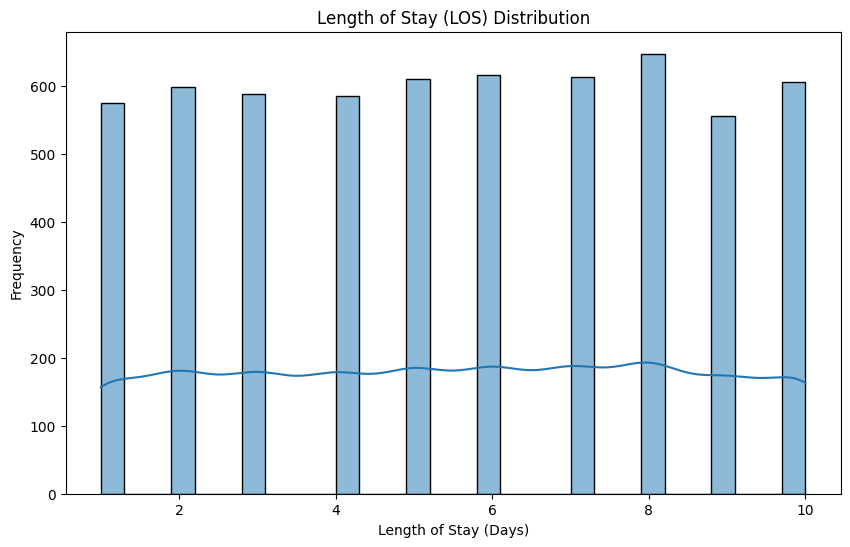

In [9]:
# Plot Length of Stay (LOS) distribution
plt.figure(figsize=(10,6))
sns.histplot(df['LengthOfStay'], kde=True, bins=30)
plt.title('Length of Stay (LOS) Distribution')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()


# **Get a summary of the dataset**

In [ ]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PatientID            6000 non-null   int64         
 1   Age                  6000 non-null   int64         
 2   Gender               6000 non-null   category      
 3   AdmissionDate        6000 non-null   datetime64[ns]
 4   DischargeDate        6000 non-null   datetime64[ns]
 5   Department           6000 non-null   object        
 6   Diagnosis            6000 non-null   object        
 7   LengthOfStay         6000 non-null   int64         
 8   Readmitted           6000 non-null   object        
 9   Mortality            6000 non-null   object        
 10  PatientSatisfaction  6000 non-null   int64         
 11  InsuranceStatus      6000 non-null   object        
 12  RevenueGenerated     6000 non-null   float64       
 13  Cost                 6000 non-nul

# **Length of Stay by Departmen % difference**

In [ ]:
# Calculate Length of Stay by Department
los_by_department = df.groupby('Department')['LengthOfStay'].mean()

# Calculate the overall average Length of Stay
overall_avg_los = df['LengthOfStay'].mean()

# Calculate the percentage difference from the overall average
los_by_department_diff = (los_by_department - overall_avg_los) / overall_avg_los * 100

# Create a DataFrame for the results
los_summary = pd.DataFrame({
    'Average Length of Stay': los_by_department,
    '% Difference from Overall Average': los_by_department_diff
})

# Display the results
los_summary

,Average Length of Stay,% Difference from Overall Average
Department,,
Cardiology,5.464529,-1.201796
Emergency,5.449373,-1.475806
Neurology,5.582075,0.923440
Oncology,5.524313,-0.120902
Orthopedics,5.686131,2.804762
Pediatrics,5.486068,-0.812365


# **Patient Satisfaction by Insurance**

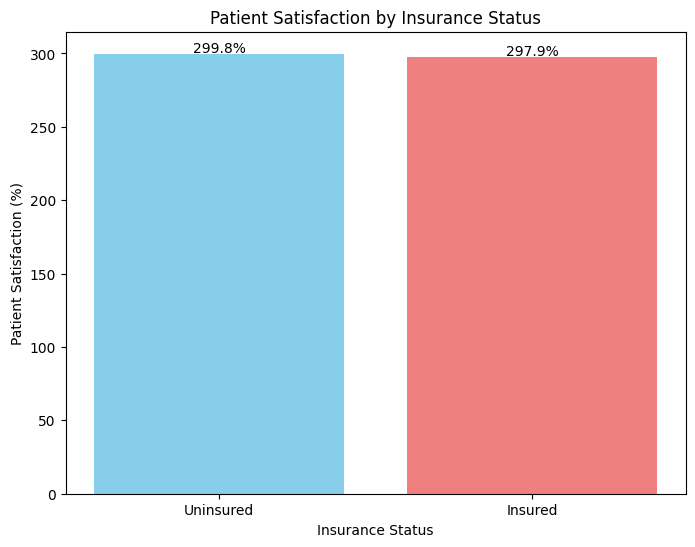

In [ ]:
# Group data by insurance status and calculate the mean patient satisfaction
satisfaction_by_insurance = df.groupby('InsuranceStatus')['PatientSatisfaction'].mean()

# Convert to percentage
satisfaction_percentage = satisfaction_by_insurance * 100

# Create labels for the plot
labels = ['Uninsured', 'Insured']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, satisfaction_percentage, color=['skyblue', 'lightcoral'])
plt.title('Patient Satisfaction by Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Patient Satisfaction (%)')

# Add percentage labels on top of the bars
for i, v in enumerate(satisfaction_percentage):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()

# **Calculate the distribution of costs for different diagnoses**

       Diagnosis  Total Cost  Percentage
0       Diabetes  1674107.61   12.928616
1         Cancer  1670288.86   12.899125
2      Pneumonia  1665694.86   12.863647
3       Fracture  1665249.71   12.860209
4         Asthma  1622759.52   12.532070
5         Stroke  1605803.06   12.401121
6  Heart Disease  1529257.64   11.809984
7   Hypertension  1515692.95   11.705228


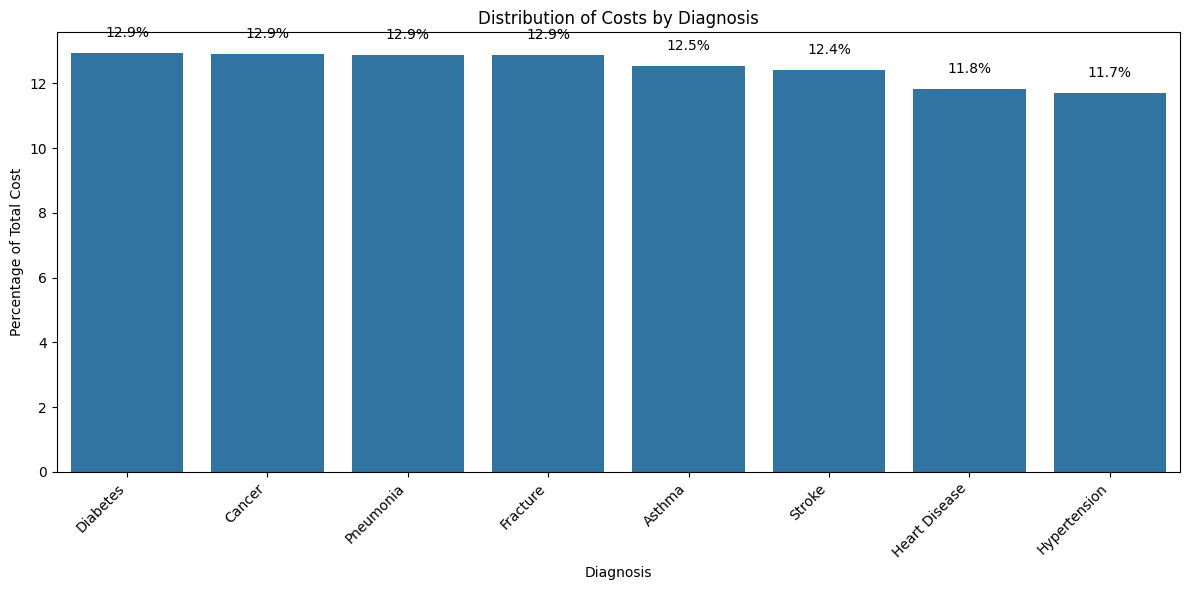

In [ ]:
# Calculate the distribution of costs for different diagnoses
cost_by_diagnosis = df.groupby('Diagnosis')['Cost'].sum()

# Calculate the total cost
total_cost = cost_by_diagnosis.sum()

# Calculate the percentage of total cost for each diagnosis
cost_percentage = (cost_by_diagnosis / total_cost) * 100

# Create a DataFrame for the results
cost_distribution = pd.DataFrame({'Diagnosis': cost_by_diagnosis.index, 'Total Cost': cost_by_diagnosis.values, 'Percentage': cost_percentage.values})

# Sort the DataFrame by percentage in descending order
cost_distribution = cost_distribution.sort_values('Percentage', ascending=False)


# Reset the index
cost_distribution = cost_distribution.reset_index(drop=True)

# Display the cost distribution
print(cost_distribution)


# Create a bar plot of the cost distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Diagnosis', y='Percentage', data=cost_distribution)
plt.title('Distribution of Costs by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage of Total Cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add percentage labels on top of the bars
for i, v in enumerate(cost_distribution['Percentage']):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# **how bed occupancy might be related to the duration of patient stays in the hospital**

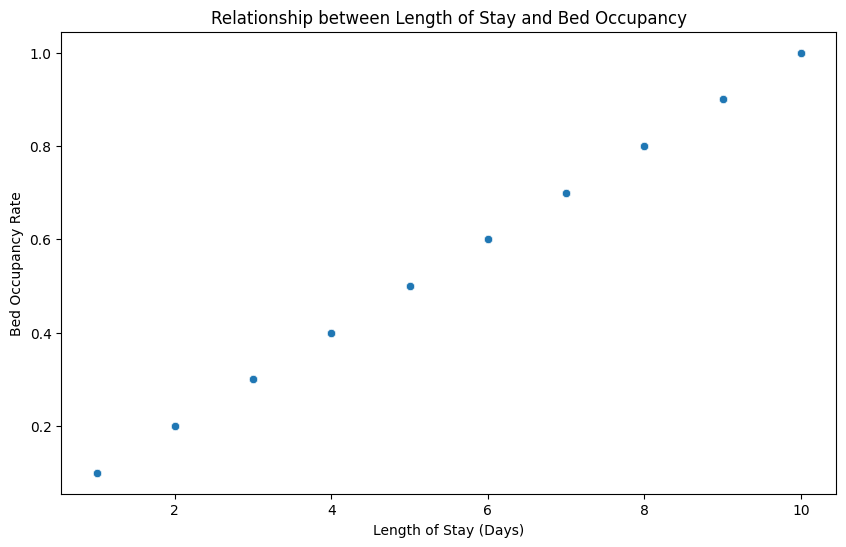

Correlation between Length of Stay and Bed Occupancy: 1.0


In [ ]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LengthOfStay', y='BedOccupancy', data=df)
plt.title('Relationship between Length of Stay and Bed Occupancy')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Bed Occupancy Rate')
plt.show()

# Correlation analysis
correlation = df['LengthOfStay'].corr(df['BedOccupancy'])
print(f"Correlation between Length of Stay and Bed Occupancy: {correlation}")


In [ ]:
# highest length of Stay by Diagnosis

# Group by 'Diagnosis' and find the maximum 'LengthOfStay' for each diagnosis
max_length_of_stay_by_diagnosis = df.groupby('Diagnosis')['LengthOfStay'].max()

# Print the result
max_length_of_stay_by_diagnosis

,LengthOfStay
Diagnosis,
Asthma,10
Cancer,10
Diabetes,10
Fracture,10
Heart Disease,10
Hypertension,10
Pneumonia,10
Stroke,10


# ***Top 10 patient with the highest length of stay***

---



In [ ]:


# Sort the DataFrame by 'LengthOfStay' in descending order and get the top 10
top_10_patients = df.sort_values(by='LengthOfStay', ascending=False).head(10)

# Display the top 10 patients with the highest length of stay
top_10_patients

,PatientID,Age,Gender,AdmissionDate,DischargeDate,Department,Diagnosis,LengthOfStay,Readmitted,Mortality,PatientSatisfaction,InsuranceStatus,RevenueGenerated,Cost,BedOccupancyStatus
3481,3482,19,Male,2022-12-12,2022-12-22,Orthopedics,Pneumonia,10,No,No,3,Yes,1799.76,1613.11,Occupied
564,565,71,Female,2022-10-24,2022-11-03,Oncology,Cancer,10,No,No,5,No,1543.58,524.61,Occupied
4140,4141,68,Male,2022-09-19,2022-09-29,Cardiology,Diabetes,10,No,No,5,Yes,4321.00,2865.02,Occupied
4514,4515,30,Female,2022-11-26,2022-12-06,Orthopedics,Asthma,10,No,No,2,Yes,2836.61,1131.35,Occupied
3407,3408,24,Male,2022-03-16,2022-03-26,Cardiology,Fracture,10,No,No,4,Yes,4882.47,1871.48,Available
3406,3407,78,Male,2022-12-18,2022-12-28,Neurology,Cancer,10,No,No,3,No,3112.11,1613.98,Available
5185,5186,50,Female,2022-06-20,2022-06-30,Orthopedics,Heart Disease,10,No,No,5,No,3026.55,1900.36,Occupied
5188,5189,46,Male,2022-03-24,2022-04-03,Oncology,Pneumonia,10,No,No,3,Yes,2762.96,3382.28,Occupied
4505,4506,56,Male,2022-11-07,2022-11-17,Neurology,Stroke,10,No,No,2,No,1821.91,1466.22,Occupied
5693,5694,70,Female,2022-11-26,2022-12-06,Neurology,Asthma,10,Yes,No,3,No,1285.51,1617.08,Occupied


In [ ]:
df.describe()

,PatientID,Age,LengthOfStay,PatientSatisfaction,RevenueGenerated,Cost
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000
mean,3000.500000,53.704667,5.53100,2.988667,2736.181663,2158.142368
std,1732.195139,20.972953,2.85232,1.416994,1293.688871,1064.443263
min,1.000000,18.000000,1.00000,1.000000,502.050000,301.500000
25%,1500.750000,36.000000,3.00000,2.000000,1612.887500,1240.352500
50%,3000.500000,54.000000,6.00000,3.000000,2716.905000,2163.565000
75%,4500.250000,72.000000,8.00000,4.000000,3857.452500,3083.767500
max,6000.000000,90.000000,10.00000,5.000000,4999.660000,3999.590000



# **Cost by department**

---



In [ ]:
# Group data by department and sum costs
cost_by_dept = df.groupby('Department')['Cost'].sum()

# Print the results
cost_by_dept

,Cost
Department,
Cardiology,2296407.01
Emergency,2286009.45
Neurology,2230809.84
Oncology,1977757.29
Orthopedics,2094176.58
Pediatrics,2063694.04



# **Total Bed Occupancy Status Calculate WOW, MOM, YOY, QOQ,**

---



In [ ]:
# Convert AdmissionDate to datetime
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])

# Extract necessary time components
df['Year'] = df['AdmissionDate'].dt.year
df['Quarter'] = df['AdmissionDate'].dt.quarter
df['Month'] = df['AdmissionDate'].dt.month
df['Week'] = df['AdmissionDate'].dt.isocalendar().week

# Total Admissions
total_admissions = df.shape[0]

# WOW (Week-over-Week)
weekly_admissions = df.groupby('Week').size()
wow_change = weekly_admissions.pct_change() * 100  # Percent change
print("WOW Change (%):\n", wow_change)

# MOM (Month-over-Month)
monthly_admissions = df.groupby(['Year', 'Month']).size()
mom_change = monthly_admissions.pct_change() * 100  # Percent change
print("MOM Change (%):\n", mom_change)

# YOY (Year-over-Year)
yearly_admissions = df.groupby('Year').size()
yoy_change = yearly_admissions.pct_change() * 100  # Percent change
print("YOY Change (%):\n", yoy_change)



WOW Change (%):
 Week
1           NaN
2     25.925926
3    -25.000000
4      1.960784
5      8.653846
6      7.079646
7      1.652893
8      0.813008
9    -14.516129
10    16.981132
11     4.032258
12    -2.325581
13   -19.841270
14    24.752475
15   -11.111111
16   -14.285714
17    26.041667
18    -6.611570
19    -3.539823
20     9.174312
21    16.806723
22   -17.985612
23     7.017544
24    -2.459016
25     5.882353
26    -9.523810
27   -13.157895
28     6.060606
29    13.333333
30    -2.521008
31     4.310345
32    -3.305785
33     5.128205
34   -14.634146
35    12.380952
36    -2.542373
37    -8.695652
38   -21.904762
39    29.268293
40     0.943396
41     6.542056
42   -12.280702
43    19.000000
44   -10.924370
45    -0.943396
46     0.952381
47     0.000000
48    22.641509
49    -2.307692
50    -9.448819
51     7.826087
52    31.451613
dtype: float64
MOM Change (%):
 Year  Month
2022  1              NaN
      2        -6.614786
      3        12.291667
      4       -12.987013
  

# **WOW (Week-over-Week)**

---



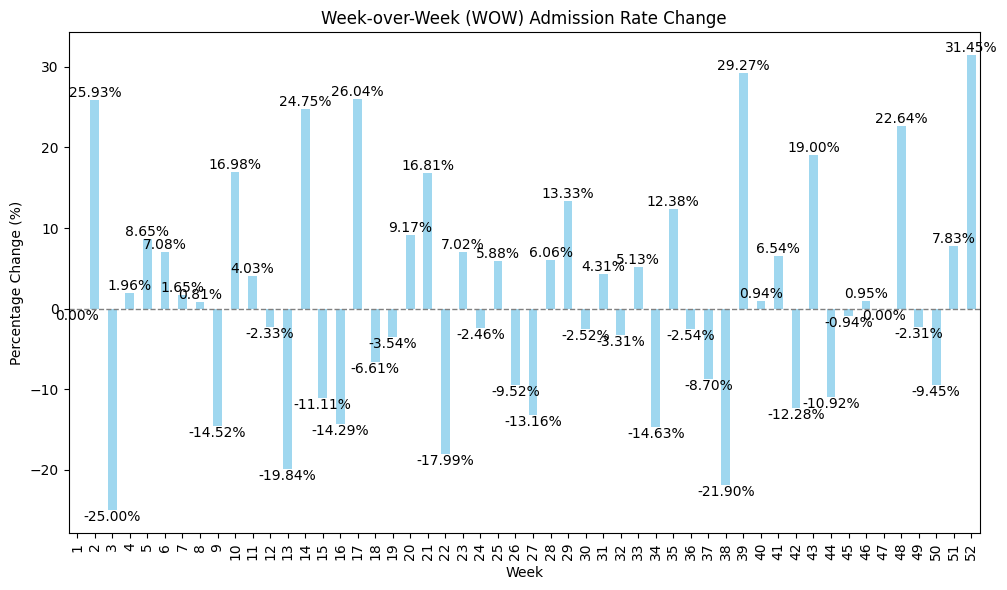

In [ ]:
# WOW (Week-over-Week) Plot with Data Labels
plt.figure(figsize=(10, 6))
bars = wow_change.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Week-over-Week (WOW) Admission Rate Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Week')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()

# Adding data labels
for bar in bars.patches:
    height = bar.get_height()
    if not pd.isna(height):  # Check for NaN values
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=height,
            s=f'{height:.2f}%',
            ha='center',
            va='bottom' if height > 0 else 'top',
            color='black'
        )

plt.show()


# **MOM (Month-over-Month)**

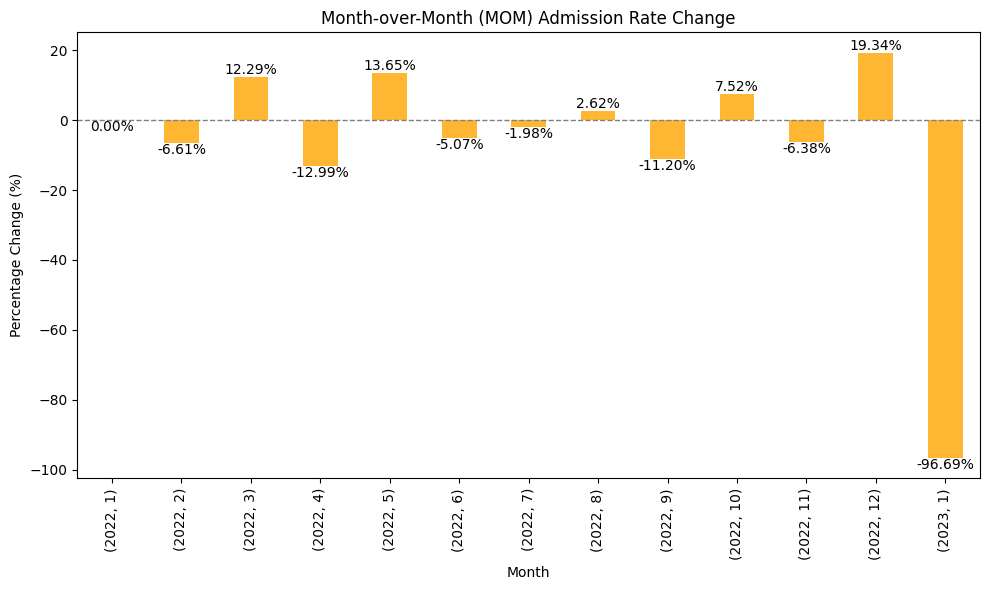

In [ ]:
# MOM (Month-over-Month) Plot with Data Labels (%)
plt.figure(figsize=(10, 6))
bars = mom_change.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Month-over-Month (MOM) Admission Rate Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Month')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()

# Adding data labels
for bar in bars.patches:
    height = bar.get_height()
    if not pd.isna(height):  # Check for NaN values
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=height,
            s=f'{height:.2f}%',  # Display percentage with two decimal places
            ha='center',
            va='bottom' if height > 0 else 'top',
            color='black'
        )

# Show the plot
plt.show()


# **QOQ (Quarter-over-Quarter)**

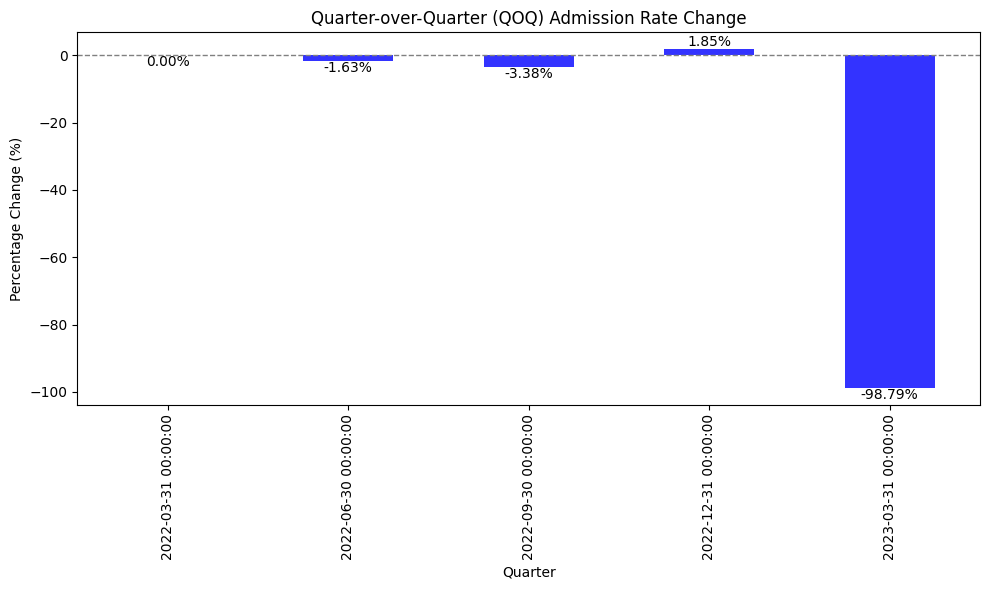

In [ ]:
# QOQ (Quarter-over-Quarter) Plot with Data Labels (%)
plt.figure(figsize=(10, 6))
bars = qoq_change.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Quarter-over-Quarter (QOQ) Admission Rate Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Quarter')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()

# Adding data labels
for bar in bars.patches:
    height = bar.get_height()
    if not pd.isna(height):  # Check for NaN values
        plt.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=height,
            s=f'{height:.2f}%',  # Display percentage with two decimal places
            ha='center',
            va='bottom' if height > 0 else 'top',
            color='black'
        )

# Show the plot
plt.show()


In [ ]:
# total BedOccupancyStatus Occupied and not by yearly

# Assuming 'AdmissionDate' column is already in datetime format

# Extract year from 'AdmissionDate'
df['AdmissionYear'] = df['AdmissionDate'].dt.year

# Group by year and 'BedOccupancyStatus', then count occurrences
yearly_bed_status = df.groupby(['AdmissionYear', 'BedOccupancyStatus']).size().unstack(fill_value=0)

# Calculate total occupied and not occupied beds for each year
yearly_bed_status['TotalOccupied'] = yearly_bed_status['Occupied']
yearly_bed_status['TotalNotOccupied'] = yearly_bed_status.drop(columns=['Occupied', 'TotalOccupied']).sum(axis=1)

print("\nYearly Bed Occupancy Status:")
print(yearly_bed_status[['TotalOccupied', 'TotalNotOccupied']])


Yearly Bed Occupancy Status:
BedOccupancyStatus  TotalOccupied  TotalNotOccupied
AdmissionYear                                      
2022                         4794              1188
2023                           18                 0


# **Mortality by Gender**

In [ ]:
#  Mortality by Gender

# Group by 'Gender' and 'Mortality' and get the total count
mortality_by_gender = df.groupby(['Gender', 'Mortality'])['PatientID'].count()

# Print the result
mortality_by_gender

<ipython-input-63-f170e4560cdc>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mortality_by_gender = df.groupby(['Gender', 'Mortality'])['PatientID'].count()


Gender  Mortality
Female  No           2963
        Yes            36
Male    No           2972
        Yes            29
Name: PatientID, dtype: int64

In [ ]:
# ... (Your existing code) ...

# Convert 'PatientSatisfaction', 'Readmitted', 'RevenueGenerated', 'Cost' to numeric, handling errors
for col in ['PatientSatisfaction', 'Readmitted', 'RevenueGenerated', 'Cost']:
    try:
        # Attempt to convert the column to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except (ValueError, TypeError):
        # If conversion fails, print a warning and skip the column
        print(f"Warning: Could not convert column '{col}' to numeric. Skipping this column for correlation.")

# Calculate the correlation including the encoded department column
correlation_matrix = df[['Department_Encoded', 'PatientSatisfaction', 'Readmitted', 'RevenueGenerated', 'Cost']].corr()
print(correlation_matrix)

# ... (Rest of your code for visualization) ...

                     Department_Encoded  PatientSatisfaction  Readmitted  \
Department_Encoded             1.000000            -0.000115         NaN   
PatientSatisfaction           -0.000115             1.000000         NaN   
Readmitted                          NaN                  NaN         NaN   
RevenueGenerated               0.009083            -0.025697         NaN   
Cost                          -0.027244            -0.012951         NaN   

                     RevenueGenerated      Cost  
Department_Encoded           0.009083 -0.027244  
PatientSatisfaction         -0.025697 -0.012951  
Readmitted                        NaN       NaN  
RevenueGenerated             1.000000 -0.018653  
Cost                        -0.018653  1.000000  


In [ ]:
# Convert AdmissionDate to datetime if not already in datetime format
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])

# Extract necessary time components
df['Year'] = df['AdmissionDate'].dt.year
df['Quarter'] = df['AdmissionDate'].dt.quarter
df['Month'] = df['AdmissionDate'].dt.month
df['Week'] = df['AdmissionDate'].dt.isocalendar().week  # ISO calendar week numbers

# Total Admissions
total_admissions = df.shape[0]
print(f"Total Admissions: {total_admissions}\n")

# Week-over-Week (WOW) percentage change
weekly_admissions = df.groupby('Week').size()  # Count admissions by week
wow_change = weekly_admissions.pct_change() * 100  # Percent change
print("Weekly Admissions:")
print(weekly_admissions)
print("\nWeek-over-Week Change (%):")
print(wow_change.round(2))

# Month-over-Month (MOM) percentage change
monthly_admissions = df.groupby(['Year', 'Month']).size()  # Count admissions by year and month
mom_change = monthly_admissions.pct_change() * 100  # Percent change
print("\nMonthly Admissions:")
print(monthly_admissions)
print("\nMonth-over-Month Change (%):")
print(mom_change.round(2))

# Year-over-Year (YOY) percentage change
yearly_admissions = df.groupby('Year').size()  # Count admissions by year
yoy_change = yearly_admissions.pct_change() * 100  # Percent change
print("\nYearly Admissions:")
print(yearly_admissions)
print("\nYear-over-Year Change (%):")
print(yoy_change.round(2))


<ipython-input-10-ba101e36db3d>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])


Total Admissions: 6000

Weekly Admissions:
Week
1     108
2     136
3     102
4     104
5     113
6     121
7     123
8     124
9     106
10    124
11    129
12    126
13    101
14    126
15    112
16     96
17    121
18    113
19    109
20    119
21    139
22    114
23    122
24    119
25    126
26    114
27     99
28    105
29    119
30    116
31    121
32    117
33    123
34    105
35    118
36    115
37    105
38     82
39    106
40    107
41    114
42    100
43    119
44    106
45    105
46    106
47    106
48    130
49    127
50    115
51    124
52    163
dtype: int64

Week-over-Week Change (%):
Week
1       NaN
2     25.93
3    -25.00
4      1.96
5      8.65
6      7.08
7      1.65
8      0.81
9    -14.52
10    16.98
11     4.03
12    -2.33
13   -19.84
14    24.75
15   -11.11
16   -14.29
17    26.04
18    -6.61
19    -3.54
20     9.17
21    16.81
22   -17.99
23     7.02
24    -2.46
25     5.88
26    -9.52
27   -13.16
28     6.06
29    13.33
30    -2.52
31     4.31
32    -3.31
33

# **Mortality rate calculated for MOM, YOY, QOQ**

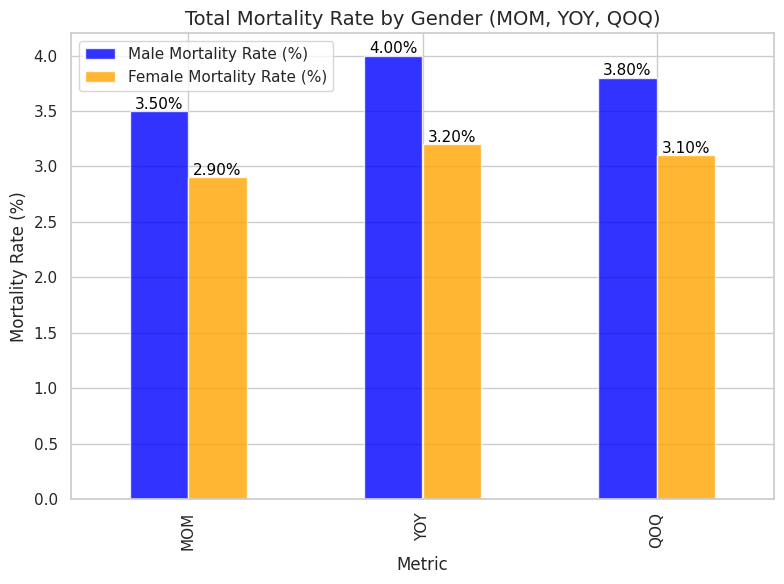

In [ ]:
# Assuming you already have the mortality rate calculated for MOM, YOY, QOQ
# For demonstration, let's create a sample dataframe for the total mortality rate

# Sample data for Total Mortality Rate by Gender (MOM, YOY, QOQ)
data = {
    'Metric': ['MOM', 'YOY', 'QOQ'],
    'Male Mortality Rate (%)': [3.5, 4.0, 3.8],  # Replace with actual values
    'Female Mortality Rate (%)': [2.9, 3.2, 3.1]  # Replace with actual values
}

# Convert to DataFrame
mortality_total = pd.DataFrame(data)

# Plotting the total Mortality Rate by Gender for MOM, YOY, and QOQ
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the total mortality rate for male and female
mortality_total.set_index('Metric').plot(kind='bar', ax=ax, color=['blue', 'orange'], alpha=0.8)

# Adding title and labels
ax.set_title('Total Mortality Rate by Gender (MOM, YOY, QOQ)', fontsize=14)
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Mortality Rate (%)', fontsize=12)

# Adding data labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


# **Calculate mortality rate as by Age Bracket**

MortalityBinary  Mortality Rate (%)
AgeBracket                         
0-18                       0.000000
19-35                      0.988701
36-50                      1.200000
51-65                      0.802568
66+                        1.292889


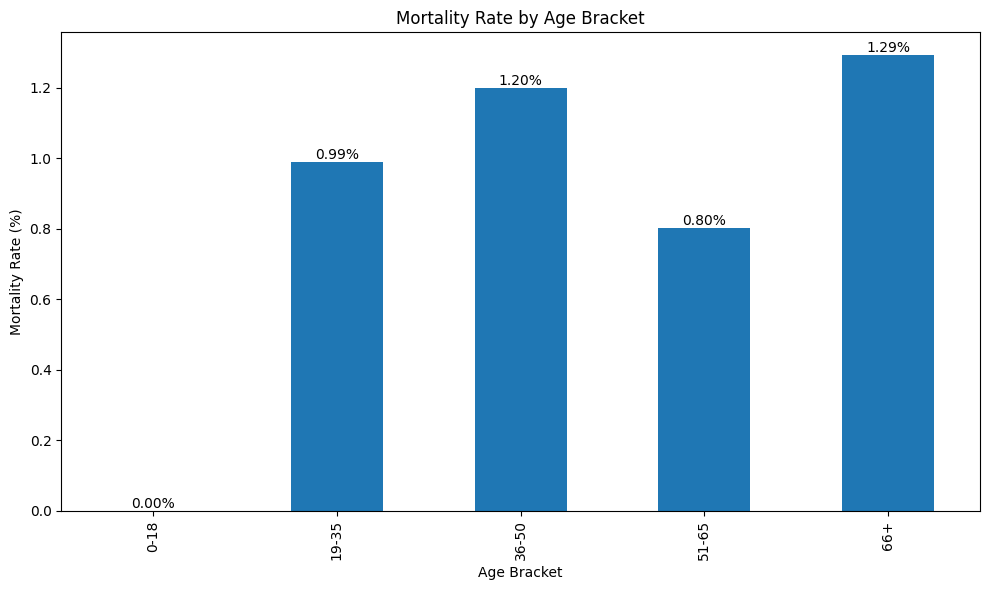

In [ ]:
# Calculate mortality rate as percentage
mortality_by_age['Mortality Rate (%)'] = mortality_by_age[1] * 100  # 1 represents death

# Display the result
print(mortality_by_age[['Mortality Rate (%)']])

# Optionally, visualize the mortality rate by age bracket
ax = mortality_by_age['Mortality Rate (%)'].plot(kind='bar', figsize=(10, 6))

# Adding the title and labels
plt.title('Mortality Rate by Age Bracket')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Age Bracket')

# Adding data labels on top of the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}%',
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Count the number of unique departments
department_count = df['Department'].nunique()
print(f"Number of unique departments: {department_count}")

# List all unique department names
department_names = df['Department'].unique()
print("List of department names:")
print(department_names)

Number of unique departments: 6
List of department names:
[4 3 0 1 2 5]


**Count of occupied beds**

In [ ]:
# Count of occupied beds
occupied_count = df[df['BedOccupancyStatus'] == 'Occupied'].shape[0]

# Total beds
total_beds = df.shape[0]

# Calculate percentage
occupied_percentage = (occupied_count / total_beds) * 100

# Print the results
print(f"Number of Occupied Beds: {occupied_count}")
print(f"Total Beds: {total_beds}")
print(f"Percentage of Occupied Beds: {occupied_percentage:.2f}%")


Number of Occupied Beds: 4812
Total Beds: 6000
Percentage of Occupied Beds: 80.20%


# **Calculate percentage of Occupied beds**

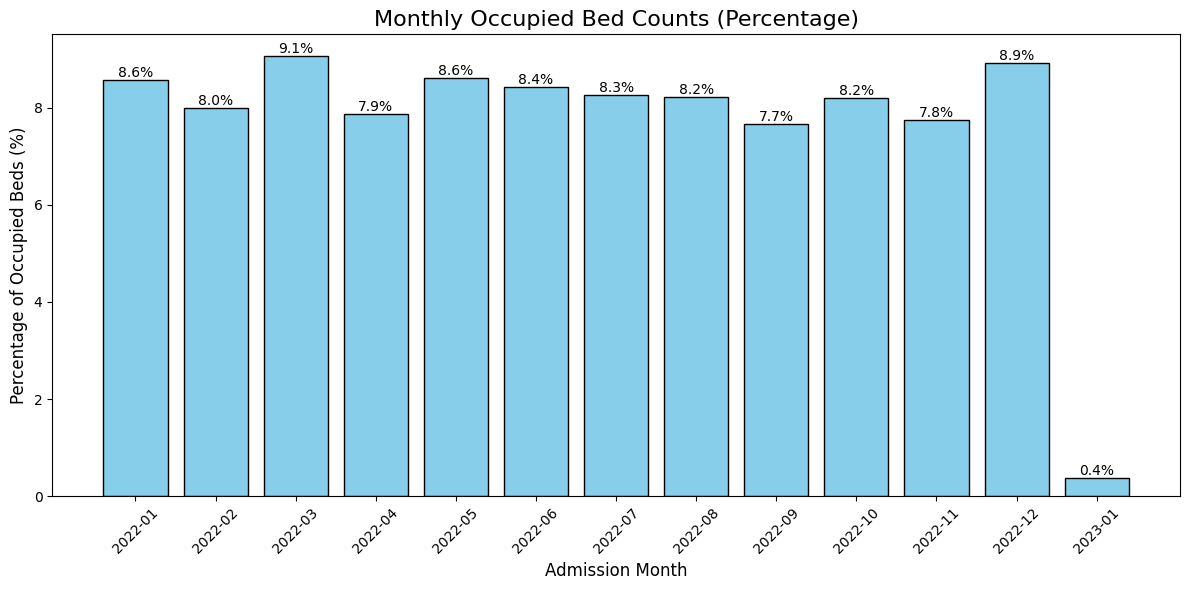

In [ ]:
# Calculate percentage of occupied beds
monthly_occupied_percentage = (monthly_occupied / monthly_occupied.sum()) * 100

# Convert to DataFrame for easier plotting
monthly_occupied_df = monthly_occupied_percentage.reset_index()
monthly_occupied_df.columns = ['AdmissionMonth', 'OccupiedBedsPercentage']

# Plotting the bar chart with percentage labels
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_occupied_df['AdmissionMonth'], monthly_occupied_df['OccupiedBedsPercentage'],
               color='skyblue', edgecolor='black')

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

# Customizing the chart
plt.title('Monthly Occupied Bed Counts (Percentage)', fontsize=16)
plt.xlabel('Admission Month', fontsize=12)
plt.ylabel('Percentage of Occupied Beds (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


# **Group by Department and calculate average Length of Stay**

<ipython-input-120-3b22f22a43e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=department_los.index, y=department_los.values, palette='Blues_d')


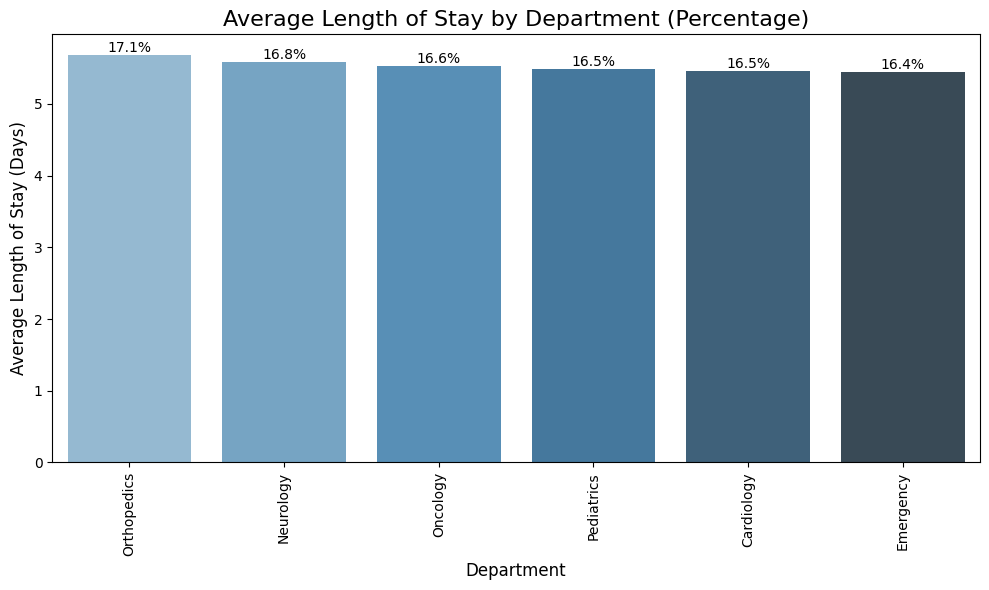

In [ ]:
# Group by Department and calculate average Length of Stay
department_los = df.groupby('Department')['LengthOfStay'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=department_los.index, y=department_los.values, palette='Blues_d')

# Adding data labels (percentages based on the total average length of stay)
total_avg = department_los.sum()
for bar, value in zip(bars.patches, department_los.values):
    percentage = (value / total_avg) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

# Customizing the chart
plt.title('Average Length of Stay by Department (Percentage)', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Length of Stay (Days)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# List the unique department names
unique_departments = df['Department'].unique()
print("Unique department names:")
print(unique_departments)


Unique department names:
['Orthopedics' 'Oncology' 'Cardiology' 'Emergency' 'Neurology'
 'Pediatrics']


In [ ]:
New_df = df.head(1000)
New_df.head()

,PatientID,Age,Gender,AdmissionDate,DischargeDate,Department,Diagnosis,LengthOfStay,Readmitted,Mortality,PatientSatisfaction,InsuranceStatus,RevenueGenerated,Cost,BedOccupancyStatus
0,1,32,Male,21/05/2022,25/05/2022,Orthopedics,Hypertension,4,No,No,5,Yes,3157.22,417.60,Occupied
1,2,47,Male,15/10/2022,19/10/2022,Oncology,Fracture,4,No,No,1,Yes,3641.63,1558.93,Occupied
2,3,61,Male,17/02/2022,24/02/2022,Cardiology,Stroke,7,No,No,1,No,2913.03,3900.53,Occupied
3,4,88,Female,18/11/2022,28/11/2022,Emergency,Heart Disease,10,No,No,2,No,4933.50,3464.68,Available
4,5,66,Female,21/08/2022,27/08/2022,Orthopedics,Stroke,6,No,No,1,Yes,2903.63,1205.80,Occupied


# **Influence of one department's performance on the hospital as a whole**

Correlation between Department and Cost: -0.027244432991389057


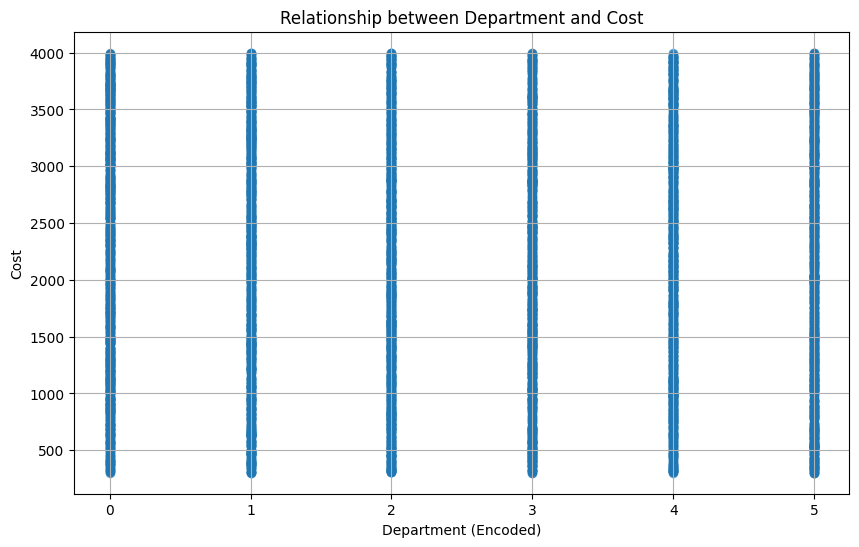

In [ ]:

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Department_Encoded'] = le.fit_transform(df['Department'])

# Calculate the correlation between 'Department_Encoded' (or encoded 'Department') and 'Cost'
department_cost_correlation = df['Department_Encoded'].corr(df['Cost'])  # Changed to use encoded column

print(f"Correlation between Department and Cost: {department_cost_correlation}")

# Visualize the relationship between Department and Cost
plt.figure(figsize=(10, 6))
plt.scatter(df['Department_Encoded'], df['Cost'], alpha=0.5)  # Changed to use encoded column
plt.title('Relationship between Department and Cost')
plt.xlabel('Department (Encoded)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [ ]:
# Further analysis (example):
# Group data by department and calculate descriptive statistics for cost
cost_by_department = df.groupby('Department')['Cost'].agg(['mean', 'median', 'std', 'count'])
print("\nCost statistics by Department:\n", cost_by_department)


Cost statistics by Department:
                     mean    median          std  count
Department                                            
Cardiology   2231.688056  2300.180  1074.517329   1029
Emergency    2204.444986  2278.600  1066.468877   1037
Neurology    2104.537585  2085.345  1052.459613   1060
Oncology     2090.652526  2025.895  1043.673506    946
Orthopedics  2183.708634  2198.980  1056.468629    959
Pediatrics   2129.715212  2131.240  1086.979393    969


# **Top 10 Patents who pay the highest Bills**

In [ ]:

## 'PatientID' and 'Cost'
# Find the top 10 patients with the highest bills (costs)

top_10_highest_bills = df.nlargest(10, 'Cost')

# Display the PatientID and Cost for the top 10 patients
print(top_10_highest_bills[['PatientID', 'Cost']])

      PatientID     Cost
4616       4617  3999.59
1332       1333  3999.11
4502       4503  3999.03
3621       3622  3998.31
2356       2357  3997.99
2426       2427  3996.06
5973       5974  3995.86
597         598  3995.64
2619       2620  3993.87
4094       4095  3993.66


In [ ]:
# Readmitted by gender total count

# Group by 'Gender' and 'Readmitted' and get the total count
readmitted_by_gender = df.groupby(['Gender', 'Readmitted'])['PatientID'].count()

# Print the result
readmitted_by_gender

<ipython-input-66-70784531ba74>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmitted_by_gender = df.groupby(['Gender', 'Readmitted'])['PatientID'].count()


Gender  Readmitted
Female  No            2861
        Yes            138
Male    No            2843
        Yes            158
Name: PatientID, dtype: int64

# **Readmission Rate by Gender**

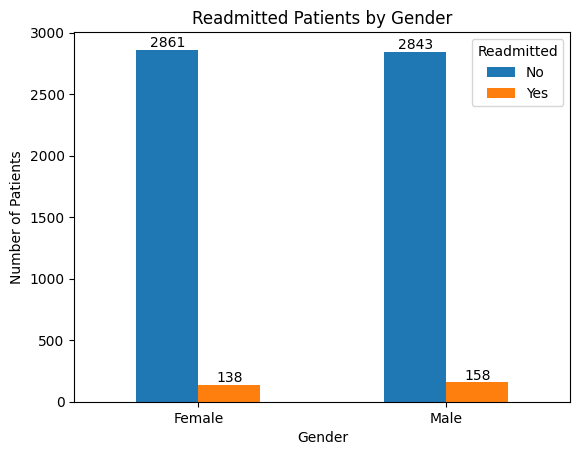

In [ ]:
# Create the plot
readmitted_by_gender.unstack().plot(kind='bar', stacked=False)

# Customize the plot
plt.title('Readmitted Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

# **Patient satisfaction vs. Length of Stay**

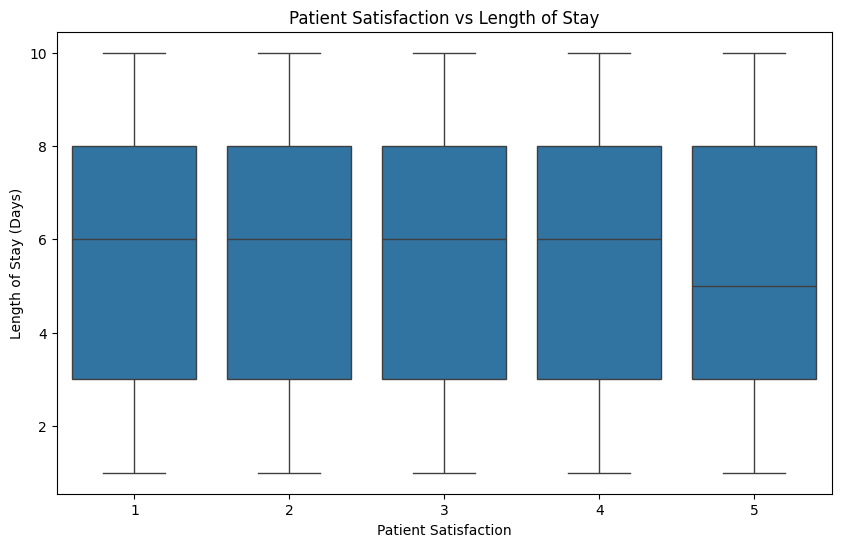

In [11]:
 patient satisfaction vs. Length of Stay
plt.figure(figsize=(10,6))
sns.boxplot(x='PatientSatisfaction', y='LengthOfStay', data=df)
plt.title('Patient Satisfaction vs Length of Stay')
plt.xlabel('Patient Satisfaction')
plt.ylabel('Length of Stay (Days)')
plt.show()



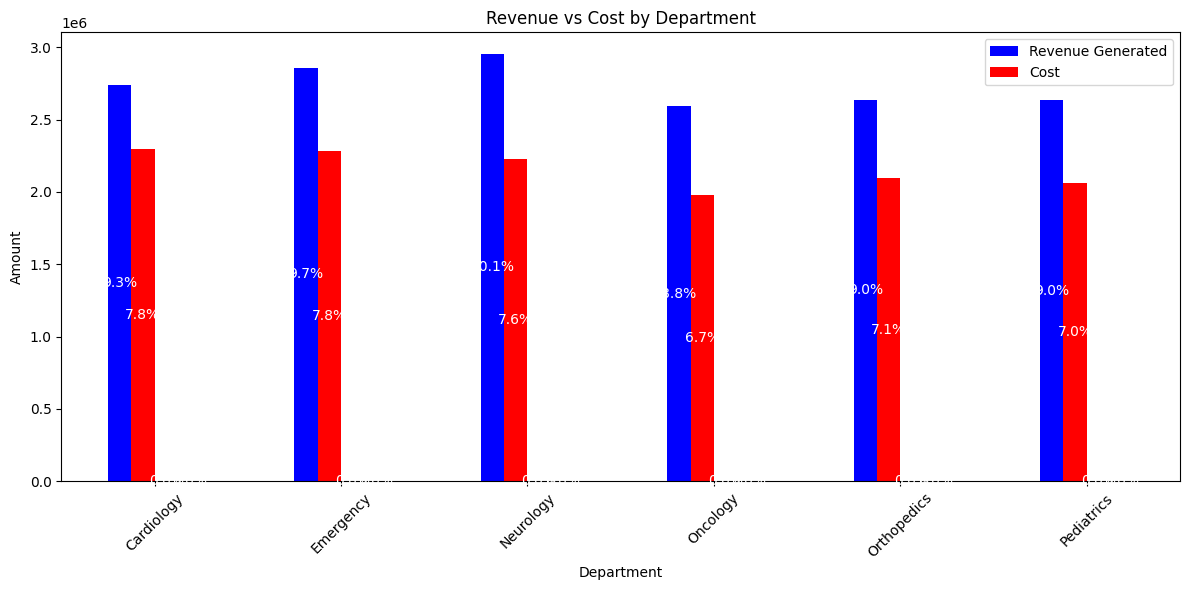

In [26]:
# Aggregate revenue and cost by department
department_revenue_cost = df.groupby('Department')[['RevenueGenerated', 'Cost']].sum().reset_index()

# Calculate the percentage of revenue and cost per department
department_revenue_cost['RevenuePercentage'] = (department_revenue_cost['RevenueGenerated'] / department_revenue_cost[['RevenueGenerated', 'Cost']].sum(axis=1)) * 100
department_revenue_cost['CostPercentage'] = (department_revenue_cost['Cost'] / department_revenue_cost[['RevenueGenerated', 'Cost']].sum(axis=1)) * 100

# Plot Revenue vs Cost by Department using bar plot
fig, ax = plt.subplots(figsize=(12, 6))
department_revenue_cost.plot(x='Department', kind='bar', stacked=False, color=['blue', 'red'], ax=ax)

# Adding percentage labels to the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    percentage = (height / sum(department_revenue_cost[['RevenueGenerated', 'Cost']].sum())) * 100
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', color='white', fontsize=10)

plt.title('Revenue vs Cost by Department')
plt.xlabel('Department')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(["Revenue Generated", "Cost"])
plt.tight_layout()
plt.show()


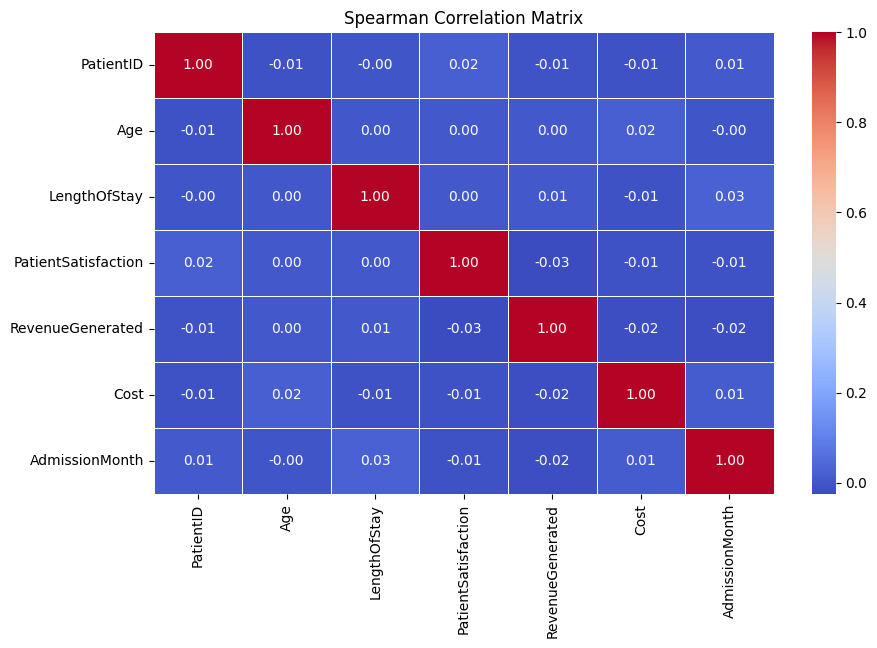

In [31]:
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
spearman_corr = df[numerical_features].corr(method='spearman')

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()